# Probability and Statistics

Probability distributions and statistical arguments are of fundamental importance in all branches of physics. Examples include: 
- **Statistical Mechanics** probability distributions are used to conceptualize and describe the aggregate the behavior of large numbers of particles (molecules in a gas) where it would it be impractical to track the behavior of each individual particle.  

- **Quantum Mechanics** probability distributions describe the likelihood of finding a particle in a particular state.

- **Astrophysics** All structure in the universe is the result of the interplay between gravity and the initial conditions of the universe. The Universe's large scale structure and its initial conditions are described with probability distributions. Statistical methods are used to measure, analyze, and interpret the distribution of matter in the Universe.

- **Particle Physics** Experiments involving particle collisions use statistical methods to interpret and analyze data. Probability is crucial in the identification of particles and the verification of new particle discoveries.

- **Nuclear Physics** Nuclear reactions and decay processes are described using probability distributions.

- **Condensed Matter Physics** Statistical methods are used to describe the behavior of large numbers of particles in a solid or liquid.

- **Experimental Physics and Observational Astronomy** Statistical methods are used to analyze data from experiments/observations, determine whether physical models are consistent with such data, and to determine the significance of experimental/observational results.

## Probability Distributions

In the last homework you analyzed household income data from the [American Community Survey](https://www.census.gov/programs-surveys/acs) (ACS) conducted by the United States Census Bureau. Using this data we constructed and plotted histograms of household income, as shown below. 

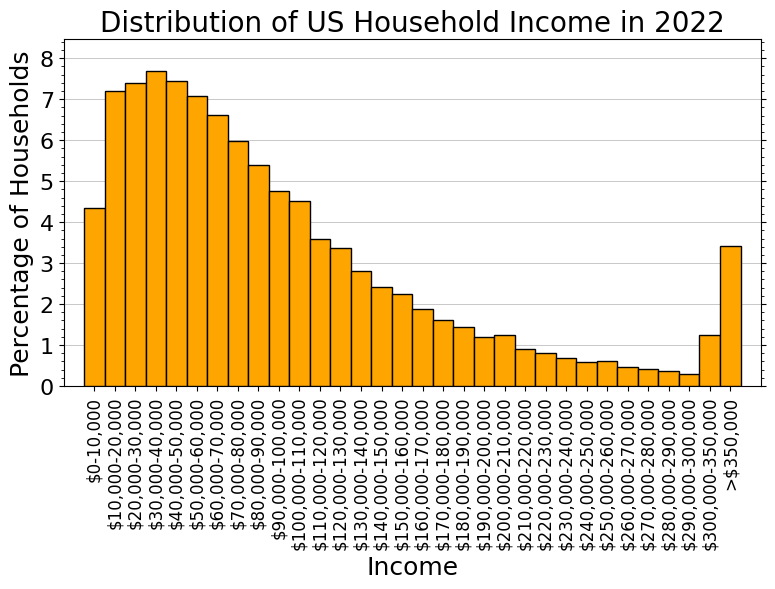

In [1]:
from census_utils import plot_census_data, generate_fake_census_data
plot_census_data()

The histogram above shows the distribution of household income in the United States in 2022. The data is binned into bins of width $\Delta I = \$10,000$ from $\$0$ to $\$300,000$, and the histogram indicates the percentage of households in each bin. To make the high-income *tail* of this distribution easier to visualize, I've chosen the last two bins to be wider: the second to last bin is from $\$300,000$ to $\$350,000$, and the last bin includes all incomes larger than $\$350,000$. 

The input data for this histogram is a list of incomes, $i_j$ for the $N_{\rm tot} = 127,970,381$ households in the United States (with income $> 0$), where $j=1,2,3,..., N_{\rm tot}$ (the average size of a US household is 2.3 people, according to this dataset).   Here $i_j$ is a continuous variable that can take on any value, whereas the centers of the histogram bins, which we will denote as $I_k$, are discrete. 

Let's  compute the histogram  over the full range of the data (i.e. without the two wider bins at the end) and use it to frame our discussion of proability distributions. You know from the homework that the real data was not a list of incomes for all $127,970,381$ housholds in the United States, but rather a shorter list of records with weights that indicate the number of households that each record represents. For the purposes of the discussion here, I've 
written code to generate a fake list of $N_{\rm tot}= 1,000,000$ incomes (without the weights) drawn from the distribution of the real data.

In [2]:
import numpy as np
incomes = generate_fake_census_data()
N_tot = len(incomes)
print(N_tot)

1000000


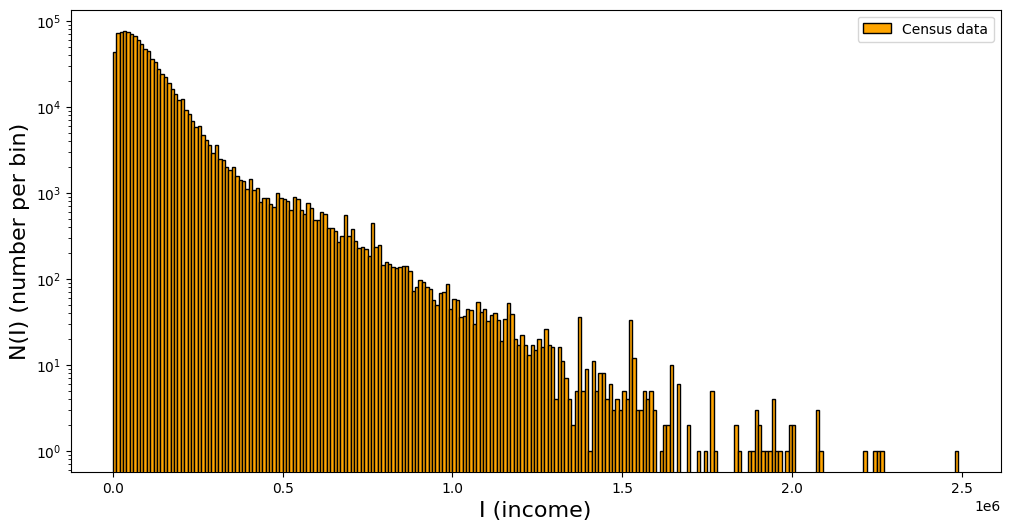

In [3]:
from matplotlib import pyplot as plt
# Construct the bins
bin_width = 10000
# Maximum value is 2,481,200, so go up to 2.5 million
I_edges = np.arange(0, 2500000, bin_width)

# Compute the histogram. Use the weights argument given how the census data is provided. 
N_of_I, _ = np.histogram(incomes, bins=I_edges)
I_centers = (I_edges[1:] + I_edges[:-1])/2

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(I_edges[:-1], N_of_I, width=np.diff(I_edges), align='edge', color='orange', alpha=1.0, edgecolor='black', zorder=10, label='Census data')
plt.xlabel('I (income)', fontsize=16)
plt.ylabel('N(I) (number per bin)', fontsize=16)
plt.legend()
plt.yscale('log')

Each histogram bin $k$ contains the number of households, $N(I_k)$, with income $i_j$ in the range $I_k - \Delta I/2 \leq i_j < I_k + \Delta I/2$, where $I_k$ is the center of the bin. The total number of households is then
<a id='eqn:N_tot'></a>
$$
N_{\rm tot} = \sum_{k=0}^{N_{\rm bins}-1} N(I_k) \tag{1},
$$
where $N_{\rm bins}$ is the number of bins in the histogram.

In [4]:
# Double check that our histogram includes all the data
assert np.sum(N_of_I) == N_tot # an assertion error will be raised if the condition is not met
print('N_tot:', N_tot)

N_tot: 1000000


### Mean, Median, and Mode

The mean income $\langle i \rangle$ is the average income over all households, 
$$
\langle i \rangle = \frac{1}{N_{\rm tot}} \sum_{j=0}^{N_{\rm tot-1}} i_j \approx \frac{1}{N_{\rm tot}} \sum_{k=0}^{N_{\rm bins}-1} I_k N(I_k) = \langle I\rangle,
$$
where the second equality is an approximation since $i_j$ is a continuous quantity, whereas the $I_k$ are discrete. In the limit that $\Delta I \rightarrow 0$, the approximation becomes exact and $\langle i \rangle = \langle I\rangle$.

In [5]:
# Two ways to compute the mean
i_bar = np.sum(incomes)/N_tot # see also np.mean(incomes)
I_bar = np.sum(N_of_I*I_centers)/N_tot
print(f'<i> = ${i_bar:.2f} ; <I> = ${I_bar:.2f}')

<i> = $102985.12 ; <I> = $103769.64


We define the relative frequency (probability) of a household having a given income $I_k$ as
$$
P(I_k) = \frac{N(I_k)}{N_{\rm tot}}. 
$$
Note that the probability distribution or distribution function, $P(I_k)$, satisfies the **normalization condition**
$$
\sum_{k=0}^{N_{\rm bins}-1} P(I_k) = \frac{1}{N_{\rm tot}} \sum_{k=0}^{N_{\rm bins}-1} N(I_k) = 1, 
$$
where we have used eqn.(<a href="#eqn:N_tot">1</a>).

In [6]:
P_of_I = N_of_I/N_tot
assert np.isclose(np.sum(P_of_I), 1.0)
print(f'The sum of the probabilities is: {np.sum(P_of_I)}')

The sum of the probabilities is: 0.9999999999999999


In [7]:
np.isclose?

Signature:       np.isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
Call signature:  np.isclose(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function isclose at 0x110637ec0>
File:            ~/miniconda3/envs/Phys29/lib/python3.11/site-packages/numpy/core/numeric.py
Docstring:      
Returns a boolean array where two arrays are element-wise equal within a
tolerance.

The tolerance values are positive, typically very small numbers.  The
relative difference (`rtol` * abs(`b`)) and the absolute difference
`atol` are added together to compare against the absolute difference
between `a` and `b`.

.. warning:: The default `atol` is not appropriate for comparing numbers
             that are much smaller than one (see Notes).

Parameters
----------
a, b : array_like
    Input arrays to compare.
rtol : float
    The relative tolerance parameter (see Notes).
atol : float
    The absolute tolerance parameter (see Notes).
equal_nan : bool
    Whether to compa

So in terms of $P(I_k)$, the mean income is
$$
\langle I\rangle = \sum_{k=0}^{N_{\rm bins}-1} I_k P(I_k).
$$

We can also calculate the mean-square income, $\langle i^2\rangle$, which is the average of the square of the income over all households,
$$
\langle i^2\rangle = \frac{1}{N_{\rm tot}}\sum_{j=0}^{N_{\rm tot}-1} i_j^2 \approx \sum_{k=0}^{N_{\rm bins}-1} I_k^2 P(I_k) = \langle I^2\rangle,
$$
or taking the square-root, we obtain the **root-mean-square** (RMS) income,
$$
I_{\rm rms} = \sqrt{\langle I^2\rangle}.
$$

A related useful quantity is the **variance** of the income distribution, which is a measure of the spread of the distribution. The variance is defined as
$$
\sigma_i^2 \equiv \langle (i - \langle i\rangle)^2\rangle \approx  \langle (I - \langle I\rangle)^2\rangle \equiv \sigma_I^2 = \sum_{k=0}^{N_{\rm bins}-1} (I_k - \langle I\rangle)^2 P(I_k), 
$$
where again the approximation arises because $i_j$ is continuous and $I_k$ is discrete.

Note that by expanding the square in the definition of the variance, we can write
$$
\begin{align*}
{\rm Var}(i) = \sigma_i^2 & \approx \sigma_I^2 = \sum_{k=0}^{N_{\rm bins}-1} (I_k^2 - 2 \langle I\rangle I_k + \langle I\rangle^2) P(I_k)\\
         &  = \sum_{k=0}^{N_{\rm bins}-1} I_k^2 P(I_k) - 2 \langle I\rangle \sum_{k=0}^{N_{\rm bins}-1} I_k P(I_k) + \langle I\rangle^2 \sum_{k=0}^{N_{\rm bins}-1} P(I_k)\\
        & = \langle I^2\rangle - 2\langle I\rangle^2 + \langle I\rangle^2\\
        &  = \langle I^2\rangle - \langle I\rangle^2.
\end{align*}
$$

The **standard deviation** is the square root of the variance, 
$$
\sigma_I = \sqrt{\sigma_I^2} = \sqrt{\langle I^2\rangle - \langle I\rangle^2}.
$$

In [8]:
# Compute the probability distribution P_of_I
P_of_I = (N_of_I/N_tot)
# Two ways to compute the standard deviation 
sigma_i = np.std(incomes) # from the original data
sigma_i_2 = np.sqrt(np.mean((incomes - i_bar)**2)) # from the original data
var_i = sigma_i**2
sigma_I = np.sqrt(np.sum(P_of_I*(I_centers - I_bar)**2)) # from the histogram
assert np.isclose(sigma_i, sigma_i_2)
print(f'sigma_i = ${sigma_i:.2f} ; sigma_I = ${sigma_I:.2f}')


sigma_i = $113409.95 ; sigma_I = $113467.93


Another useful quantity for characterizing probability distributions is the **mode**
$$
I_{\rm mode} = \max_k P(I_k),
$$
which is the value of $I_k$ at which the probability distribution is maximized.  This is the most probable value of the income if you randomly draw households from the US population. 

In [9]:
# Compute the mode
k_max = np.argmax(P_of_I)
I_mode = I_centers[k_max]
print(f'The mode of the distribution is: ${I_mode:.2f}')

The mode of the distribution is: $35000.00


### The Cumulative Distribution Function

Another very important quantity is the **cumulative distribution function** (CDF), which is defined by 
$$
{\rm CDF}(\le I_k) = \sum_{k^\prime=0}^{k} P(I_{k^\prime}). 
$$
Since it sums over all $P(I_k)$ for $k^\prime \le k$, the CDF is a measure of the probability that a household has an income less than or equal to $I_k$. For example, for the household income data, if the probability that a household has an income less than or equal to \$128,000 is 75% then ${\rm CDF}(\le \$128,000) = 0.75$. In code, we can compute the CDF using
the `np.cumsum` function in `numpy` as we will show below. 

The **median** is the value of $I_k$ encompassing 50% of the cumulative probability. It is defined by the equation
$$
\sum_{k=0}^{k_{\rm med}} P(I_k) = 0.5 \quad ; \quad I_{\rm k_{\rm med}} \equiv \text{the median income}. 
$$
If we return to the continuous variable $i_j$, the median income is the value of $i_j$ such that 50% of the households have an income less than or equal to this value, which is just the *midpoint* of the list of $i_j$ values when they are sorted in ascending order.

i_median = $73000.00 ; I_median = $75000.00


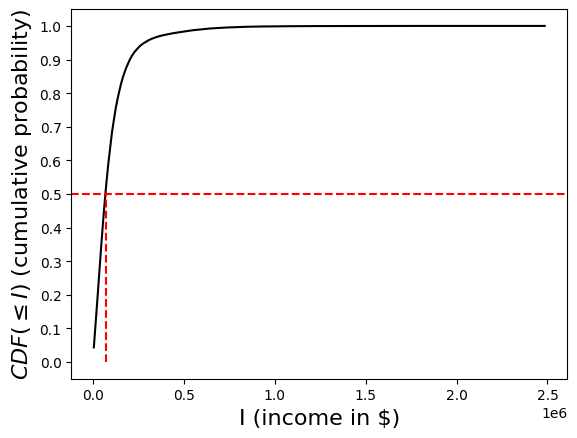

In [10]:
from matplotlib.ticker import MultipleLocator
# Two ways to compute the median
i_median = np.median(incomes) # First way, from the original data
# Second way, from histogram find the bin that contains 50% of the cumulative probability
P_cumulative = np.cumsum(P_of_I) 
# Cumsum means P_cumulative[0] = P_of_I[0]; P_cumulative[1] = P_of_I[0] + P_of_I[1], etc.
# Find the first bin where the cumulative probability exceeds 0.5
k_med = np.argmax(P_cumulative > 0.5) 
# np.argmax finds the index of the maximum value in a numpy array. For a Boolean array, the
# maximum value is True, and np.argmax defaults to return the first element at which the max 
# is achieved, which is here the first element of the array where the condition is true
I_median = I_centers[k_med]
plt.plot(I_centers, P_cumulative, 'k-')
plt.xlabel('I (income in $)', fontsize=16)
plt.ylabel(r'$CDF(\leq I)$ (cumulative probability)', fontsize=16)
plt.axhline(0.5, color='red', linestyle='--')
plt.plot([i_median, i_median],[0.0, 0.5], color='red', linestyle='--')
# Set the major tick mark spacing on the y-axis to 0.1
plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
print(f'i_median = ${i_median:.2f} ; I_median = ${I_median:.2f}')


Notice that the mean and median of the US household income distribution are not the same: 

In [11]:
print(f'The mean=${i_bar:.2f}, whereas the median=${i_median:.2f}')

The mean=$102985.12, whereas the median=$73000.00


The reason for this is that the distribution posseses a large tail of high-income households, which pulls the mean towards higher values relative to the median.

### Discrete vs. Continuous Probability Distributions

In some applications the variable of interest is discrete, for example if we are considering rolling a die, there are six discrete possible outcomes: 1, 2, 3, 4, 5, or 6, but a value of 1.5 is impossible. So the probability distribution would similarly have six 
discrete values, $P(1)$, $P(2)$, $P(3)$, $P(4)$, $P(5)$, and $P(6)$.

In other cases the variable is continuous, for example household incomes, $i_j$, can take on any real number in the range $0 \leq i_j < \infty$. In the example above however, we were dealing with a dataset with a finite number of entires. To visualize the probability distribution of a continuous variable for a finite dataset, we use a histogram, $P(I_k)$, with a finite number of discrete bins. 

Now consider the case of a continuous distribution of some variable $x$. We define $P(x)$ by
$$
N(x) = N_{\rm tot} P(x) \Delta x \quad ; \quad N(x)\propto \Delta x,  
$$
where $N(x)$ is the number of events in the range $x$ to $x+\Delta x$. Clearly in the limit $\Delta x \rightarrow 0$ and $N_{\rm tot} \rightarrow \infty$,  $P(x)$ goes from being a histogram to a continuous function 
$$
P(x) = \lim_{\substack{\Delta x \to 0 \\ N_{\rm tot} \to \infty}} \frac{N(x)}{N_{\rm tot} \Delta x}. 
$$

For continuous probability distributions, the discrete sums then become integrals, i.e. 
$$
\int P(x) dx = 1, \quad \quad \text{normalization condition}.
$$
Note that $P(x)$ is a **probability density** and now has units of $[1/x]$, i.e. $P(x)dx$ is the infinitesimal dimensionless probability of finding $x$ in the range $x$ to $x+dx$.

The mean is now defined by
<a id='eqn:mean'></a>
$$
\langle x\rangle = \int x P(x) dx, \quad \quad \text{mean}, \tag{2}
$$
and likewise the variance is
<a id='eqn:variance'></a>
$$
{\rm Var}(x) = \sigma^2 = \int (x - \langle x\rangle)^2 P(x) dx, \quad \quad \text{variance}. \tag{3}
$$

For a continuous variable defined on the entire  real line, $x \in (-\infty, \infty)$, the CDF then becomes
$$
{\rm CDF}(\le x) = \int_{-\infty}^x P(x^\prime) dx^\prime,
$$
where again ${\rm CDF}(\le x)$ is the probability of encountering a value that is less than or equal to $x$.  

The median of the distribution then becomes
$$
{\rm CDF}(\le x_{\rm med}) = 0.5 \quad ; \quad x_{\rm med} \equiv \text{the median value}.
$$
for the continous case. 

### Probability Distributions of Multiple Variables and Statistical Independence

In many cases that arise we are interested in the probability distribution of multiple random variables. For example, in the case of the American Community Survey, we might be interested in the **joint probability distribution** of household income and the number of people in the household $P(I,N)$. 

A related concept to a probability distribution of multiple variables, is a **conditional probability** distribution. The conditional probability is the probability that something occurs given that we know something else has occurred. For example, if we imagine holding the household size fixed at a specific value of $N$ (say $N=1$ person), what is the probability distribution of, $I$, the income for these one person households. You can imagine mapping this conditional income distribution out at each value of $N$. Mathematically, we write this as the conditional probability distribution $P(I|N)$, which is read as *the probability of $I$ given $N$*. 

In general, the joint probability distribution of two variables, $x$ and $y$, is related to the conditional probability by
<a id='eqn:P(x|y)'></a>
$$
P(x,y) = P(x|y)P(y), \tag{4} 
$$
which makes intuitive sense: the probability of $x$ and $y$ occurring together is the probability of $x$ occurring given that $y$ has occurred, times the probability of $y$ occurring. Of course we could also think about it the opposite way, i.e.
<a id='eqn:P(y|x)'></a>
$$
P(x,y) = P(y|x)P(x), \tag{5}
$$
which says: the probability of $x$ and $y$ occurring together is the probability of $y$ occurring given that $x$ has occurred, times the probability of $x$ occurring. 

The two variables $x$ and $y$ are **statistically independent** if the probability distribution of $x$ is not affected by the value of $y$, and vice versa, i.e. 
$$
P(x|y) = P(x) \quad \text{and} \quad P(y|x) = P(y).
$$
Plugging either of these equations into eqns.(<a href="#eqn:P(x|y)">4</a>) or (<a href="#eqn:P(y|x)">5</a>) we see that the joint probability distribution of $x$ and $y$ is the product of the individual probability distributions of $x$ and $y$, i.e.
<a id='eqn:joint'></a>
$$
P(x,y) = P(x)P(y). \tag{6}
$$
Again this makes intuitive sense. If we have two independent dice, the probability of rolling a 3 on one die is not affected by the value of the other die, and vice versa.  Hence the probability of rolling a 3 on both dice is the product of the probability of rolling a 3 on each die individually.

Finally, because of the symmetry of  eqns.(<a href="#eqn:P(x|y)">4</a>) or (<a href="#eqn:P(y|x)">5</a>), we can equate them to arrive at one of the most important results in probability theory, **Bayes' Theorem**:
$$
P(x,y) =  P(x|y)P(y) = P(y|x)P(x) \quad \rightarrow \quad P(x|y) = \frac{P(y|x)P(x)}{P(y)}, 
$$
which forms the foundation of **Bayesian statistics**. We will use Bayes' theorem in a future lecture when we discuss fitting models to data, also known as statistical inference. 

### Properties of the Mean and Variance Operators
The mean and variance over the probability distribution governing a random process are **operators** that instruct us to perform a specific mathematical operation. For example, consider a single continuous random variable $x$ governed by a probability distribution $P(x)$. For an arbitrary function $f(x)$, the mean over
the distribution is 
$$
\langle f(x) \rangle = \int f(x) P(x) dx, \quad \quad \text{mean; single variable $x$}. 
$$
and the variance is
$$
{\rm Var}[f(x)] = \int \left[f(x) - \langle f(x)\rangle\right]^2 P(x)dx, \quad \quad \text{variance; single variable $x$}.
$$
Similarly, for two random variables $x$ and $y$ governed by a joint probability distribution, $P(x,y)$, the mean of the function $f(x,y)$ would be
$$
\langle f(x,y) \rangle = \int f(x,y) P(x,y)dxdy, \quad \quad \text{mean; two variables $x$ and $y$},
$$
and  the variance is
$$
{\rm Var}[f(x,y)] = \int \left[f(x,y) - \langle f(x,y)\rangle\right]^2 P(x,y)dxdy, \quad \quad \text{variance; two variables $x$ and $y$}. 
$$


Later we will exploit the fact that these operators satisfy certain properties, *independent of the functional form of the probability distribution*.  For example if $A$ is a constant that does not depend on the random variable(s), then 
$$ 
\langle A \rangle = A \quad \text{and} \quad {\rm Var}(A) = 0, 
$$
which you can easily prove by using the definitions above (see also eqns.(<a href="#eqn:mean">2</a>) and (<a href="#eqn:variance">3</a>)).

Additionally, 
$$
\langle A x \rangle = A \langle x \rangle \quad \quad \text{and} \quad \quad {\rm Var}(A x) = A^2 {\rm Var}(x).   
$$
The mean is a **linear operator**
$$
\langle Ax + By \rangle = A\langle x \rangle + B\langle y \rangle
$$

Finally, if $x$ and $y$ are **statistically independent** random variables, i.e. $P(x,y) = P(x)P(y)$, and $A$ and $B$ are constants, then it follows that
$$
 {\rm Var}(Ax + By) = A^2{\rm Var}(x) + B^2{\rm Var}(y), 
$$
where 
$$
\langle x \rangle = \int x P(x) dx, \quad \quad \text{and} \quad \quad {\rm Var}(x) = \int (x-\langle x\rangle)^2 P(x) dx. 
$$
and likewise for $y$.

You will prove these properties in the homework.

### Common Probability Distributions and Random Sampling

#### The Uniform Distribution 

A very common distribution is the **uniform** distribution, which is defined by a constant probability density  over a range of values. The probability density function for a uniform distribution is given by
$$
U(x|a,b) = 
\begin{cases} 
\frac{1}{b-a} & \text{for } a \leq x < b, \\
0 & \text{otherwise}.
\end{cases}
$$

As we previously discussed in Week5, we can generate pseudo-random numbers from various distributions using the `np.random` module. 

Pseudo-random numbers require a **seed** to start the sequence of numbers. The seed is a number that is used to initialize the random number generator. If you use the same seed, you will get the same sequence of random numbers. If you don't specify a seed, the random number generator will use the current time as the seed, which means that the program you write will generate a different sequence of random numbers each time you run it, and hence any results (or bugs) will not be reproducible. I advise you to always specify a seed. 

In [12]:
# Instantiate the random number generator object with a seed 
seed = 42
rng = np.random.default_rng(seed)
x1 = rng.uniform(low=0.0, high=1.0, size=(10,))
# see also rng.random(10) which generates 'standard' uniform deaviates between 0 and 1
print(x1)
# if we call this generator again, we get 10 more unique values
x2 = rng.uniform(low=0.0, high=1.0, size=(10,))
print(x2)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]
[0.37079802 0.92676499 0.64386512 0.82276161 0.4434142  0.22723872
 0.55458479 0.06381726 0.82763117 0.6316644 ]


In [13]:
# Reinitialize the generator with the same seed gives the same sequence
seed = 42
rng = np.random.default_rng(seed)
x_reinit = rng.uniform(low=0.0, high=1.0, size=(20,))
print(x_reinit)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594 0.37079802 0.92676499
 0.64386512 0.82276161 0.4434142  0.22723872 0.55458479 0.06381726
 0.82763117 0.6316644 ]


In [14]:
# Reinitialize the generator with the same seed gives the same initial sequence
seed = 42
rng = np.random.default_rng(seed)
x_reinit = rng.uniform(low=0.0, high=1.0, size=(10,))
print(x_reinit)
# since we now generate Gaussian deviates in between, the sequence will be different
x_norm = rng.normal(loc=0.0, scale=1.0, size=(10,))
x_reinit2 = rng.uniform(low=0.0, high=1.0, size=(10,))
print(x_reinit2)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]
[0.75808774 0.35452597 0.97069802 0.89312112 0.7783835  0.19463871
 0.466721   0.04380377 0.15428949 0.68304895]


The `scipy.stats` module is very useful for working with probability distributions, although I would not use it to generate random numbers because it does not have as sophisticated an interface for seeding the generators as `np.random`.

a_samp = 0.0000000534029949 ; b_samp = 1.0000000000000000


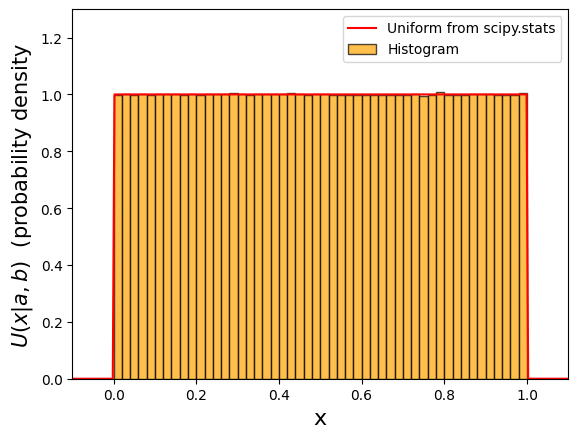

In [15]:
from scipy import stats
import numpy as np

a, b = 0, 1
# Generate random numbers from a uniform distribution
x = rng.uniform(low=a, high=b, size=(10000000,))

# Print out some stats from our samples 
a_samp, b_samp = np.min(x), np.max(x)
print(f'a_samp = {a_samp:.16f} ; b_samp = {b:.16f}')

# Compute the histogram
bins = np.linspace(-0.2, 1.2, 71)
counts, _ = np.histogram(x, bins=bins, density=True) 

# Plot the histogram
plt.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='Histogram')

# Compute the uniform distribution function on a finer grid
x_fine = np.linspace(-2, 2, 1000)
uniform = stats.uniform.pdf(x_fine, loc=a, scale=b-a)
# Plot the uniform distribution function
plt.plot(x_fine, uniform, 'r-', label='Uniform from scipy.stats')

# Add labels and legend
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$U(x|a, b)$' + '  (probability density', fontsize=15)
plt.legend()
plt.xlim(-0.1, 1.1)
plt.ylim(0, 1.3)
plt.show()

#### The Gaussian Distribution
By far the most common probability distribution is the **Gaussian** or **normal** distribution also sometimes referred to as the **bell curve**. The probability density function for a Gaussian distribution is given by
$$
\mathcal{N}(x| \mu, \sigma) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right],
$$
where $\mu$ is the mean of $x$, i.e. $\langle x\rangle$,  $\sigma^2$ is the variance of $x$. 


In [16]:
x_gauss = rng.normal(loc=0.0, scale=1.0, size=(10,))
# See also rng.randn which generates 'standard' normal deviates with mean 0 and standard deviation 1
print(x_gauss)

[ 1.59529054 -0.33549894 -1.15173024  1.00562398  0.71245578  0.01674975
  1.13761107 -0.00228731  0.52851527  1.04061176]


mu = -0.001516791581 ; sigma = 1.000274767748


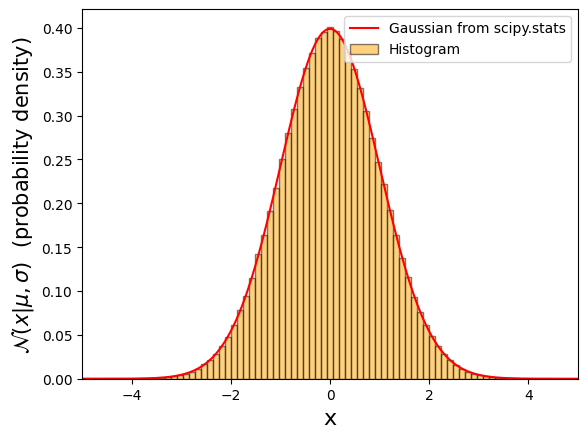

In [23]:
from scipy import stats
import numpy as np

x = rng.normal(loc=0.0, scale=1.0, size=(1000000,))

# Print out some stats from our samples 
mu, sigma = np.mean(x), np.std(x)
print(f'mu = {mu:.12f} ; sigma = {sigma:.12f}')

# Compute the histogram
bins = np.linspace(-6, 6, 100)
counts, _ = np.histogram(x, bins=bins, density=True)

# Plot the histogram
plt.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='orange', alpha=0.5, edgecolor='black', label='Histogram')

# Compute the Gaussian probability distribution function on a finer grid
x_fine = np.linspace(-6, 6, 1000)
gaussian = stats.norm.pdf(x_fine, loc=mu, scale=sigma)
# Plot the Gaussian probability distribution function
plt.plot(x_fine, gaussian, 'r-', label='Gaussian from scipy.stats')

# Add labels and legend
plt.xlabel('x', fontsize=16)
plt.ylabel(r'$\mathcal{N}(x|\mu, \sigma)$' + '  (probability density)', fontsize=15)
plt.legend()
plt.xlim(-5, 5)
plt.show()

##### Some Nice Properties of Gaussians

Gaussians have many nice properties that make them very useful in physics and statistics and very easy to manipulate. A few that we will use are: 

- If $x$ is Gaussian distributed with mean $\mu$ and variance $\sigma^2$, then $a x + b$ is also Gaussian distributed with mean $a\mu + b$ and variance $a^2\sigma^2$.

- If $x_1$ and $x_2$ are independent Gaussian random variables with means $\mu_1$ and $\mu_2$ and variances $\sigma_1^2$ and $\sigma_2^2$, then the sum $x_1 + x_2$ is also a Gaussian random variable with mean $\mu_1 + \mu_2$ and variance $\sigma_1^2 + \sigma_2^2$.

- It thus follows that any linear combination of independent Gaussian random variables is also Gaussian with simple rules to 
compute the mean and variance of the resulting distribution.

We will not take the time to prove these properties here, but they are very useful in many applications. We will quickly demonstrate
using code. 

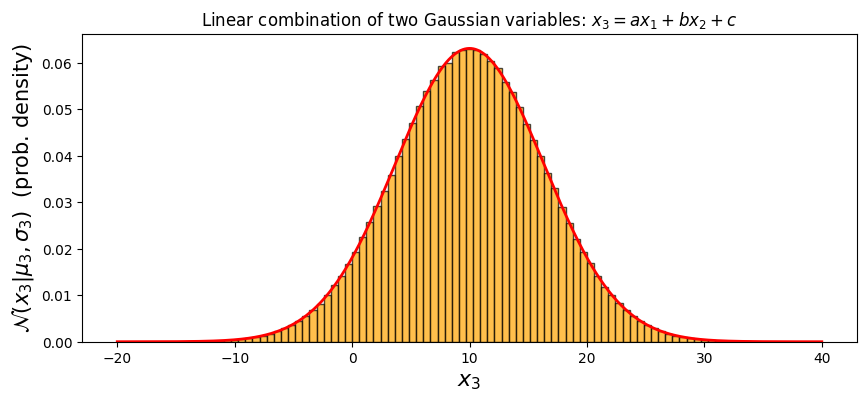

10 6.324555320336759


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the seed for reproducibility

# Generate Gaussian distributed random variables
mu1, sigma1 = 0, 1
mu2, sigma2 = 2, 2
x1 = rng.normal(mu1, sigma1, 1000000)
x2 = rng.normal(mu2, sigma2, 1000000)

# Create a linear combination of x1 and x2
a, b, c = 2, 3, 4
x3 = a * x1 + b * x2 + c
mu3 = a * mu1 + b * mu2 + c
sigma3 = np.sqrt(a**2*sigma1**2 + b**2*sigma2**2)

# Compute the histogram
bins = np.linspace(-20, 40, 100)
Pofx3, _ = np.histogram(x3, bins=bins, density=True)

# Plot the histogram and the Gaussian distribution function
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the histogram
ax.bar(bins[:-1], Pofx3, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='Histogram')

# Compute the Gaussian distribution function on a finer grid
x_fine = np.linspace(-20, 40, 1000)
gaussian = norm.pdf(x_fine, loc=mu3, scale=sigma3)
ax.plot(x_fine, gaussian, 'r', linewidth=2)
ax.set_title(r"Linear combination of two Gaussian variables: $x_3 = a x_1 + b x_2 + c$")

# Add labels and legend
ax.set_xlabel(r'$x_3$', fontsize=16)
ax.set_ylabel(r'$\mathcal{N}(x_3|\mu_3, \sigma_3)$' + '  (prob. density)', fontsize=15)
plt.show()
print(mu3, sigma3)


#### Counting Statistics and the Poisson Distribution 

In physics we often deal with situations where we are counting the number of randomly occuring events whose occurences are uncorrelated with each other. Some examples are: 
- The number of decays of a radioactive substance in a given time interval.
- The number of photons detected by a telescope in a given time interval.
- The number of galaxies measured in a random area of the sky. 
- The number of interactions recorded in some energy range, $E$ to $E + \Delta E$, between high energy particles and our particle detector. 
- The number of defects and dislocations in materials. 
  
The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in some fixed interval (of time, space, energy, wavelength, or any other variable) if these events occur with a known constant mean rate, and if the occurence of the events are independent of each other. Discrete here mans that the number of events, $k$, can only take on integer values, $k = 0, 1, 2, 3, \cdots$, as is the nature of countable things.  The Poisson distribution is given by
$$
P(k|\mu) = \frac{\mu^k}{k!}\exp(-\mu),
$$
where $\mu$ is the mean number of events expected in the chosen interval and $k$ is the independent random variable which is the number of events that actually occured in that interval. Here $k!\equiv k(k-1)(k-2)\cdots 1$ is the factorial of $k$.

For example, consider a call center which randomly receives an average of $\mu = 3.2$ calls per minute at all times of the day. If the calls are independent, receiving one does not change the probability of when the next one will arrive. Under these assumptions, the number $k$ of calls received during any minute will follow a Poisson probability distribution. 

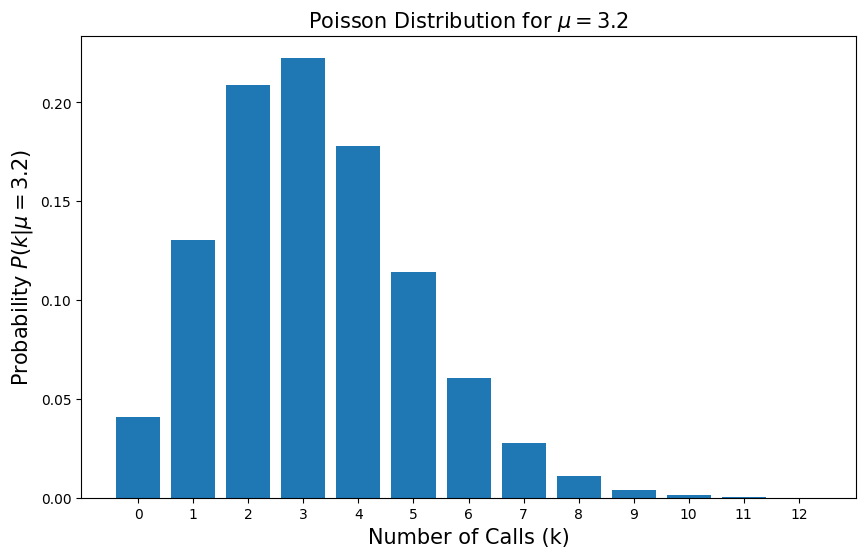

In [25]:
mu = 3.2  # average number of calls per minute

# Generate a range of k values
k_values = np.arange(0, 13)

# Calculate the Poisson probabilities for each k. Since it is a discrete distribution, 
# the P(k|mu) is given by the PMF = probability mass function 
# (as opposed to the PDF = probability density function)
probabilities = stats.poisson.pmf(k_values, mu)

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Poisson distribution on the axes
ax.bar(k_values, probabilities)
ax.set_xlabel('Number of Calls (k)', fontsize=15)
ax.set_ylabel(r'Probability $P(k | \mu = {:.2})$'.format(mu), fontsize=15)
ax.set_title(r'Poisson Distribution for $\mu = {:.2}$'.format(mu), fontsize=15)

# Set xticks to match k_values
ax.set_xticks(k_values)
plt.show()


We can use `scipy.stats.poisson` to print out the probabilities for some relevant values of $k$, as well as compute some cumulative probabilities:
- the total probability of receiving $k=1$ to $k=4$ calls in a minute
- the total probability of receiving $k\leq 6$ calls in a minute, which is given by the cumulative distribution function, ${\rm CDF}(\leq 6)$
- the total probability of recieivng $k > 6$ calls in a minute, which is given by $1 - {\rm CDF}(\leq 6)$.

In [27]:
kvals = np.arange(0, 13)
prob_k = stats.poisson.pmf(kvals, mu)
print(f"k      P(k|mu)")
print(f"--------------")
for k, p in zip(kvals, prob_k):
    print(f"{k:2d}      {p:.5f}")
print(f"--------------")


# Probability of receiving between 1 to 4 calls 
prob_1_to_4 = stats.poisson.pmf(np.arange(1, 5), mu).sum()
print(f"Probability of k=1-4 calls = {np.sum(prob_1_to_4):.4f}")
# Probability of receiving <= 6 calls is given by the CDF(<= 6)
prob_le_6 = stats.poisson.cdf(6, mu)
print(f"Probability of k<=6  calls = {prob_le_6:.4f}")
# Probability of receiving > 6 calls is given by 1 - CDF
prob_gt_6 = 1 - prob_le_6 # Note this does not include 6
print(f"Probability of k>6   calls = {prob_gt_6:.4f}")

k      P(k|mu)
--------------
 0      0.04076
 1      0.13044
 2      0.20870
 3      0.22262
 4      0.17809
 5      0.11398
 6      0.06079
 7      0.02779
 8      0.01112
 9      0.00395
10      0.00126
11      0.00037
12      0.00010
--------------
Probability of k=1-4 calls = 0.7399
Probability of k<=6  calls = 0.9554
Probability of k>6   calls = 0.0446


Since the Poission distribution is a discrete probability distribution, it obeys the discrete version of the normalization condition, i.e.
$$
\sum_{k=0}^\infty P(k|\mu) = 1.
$$
We can easily prove that this condition is satisfied since
$$
\sum_{k=0}^\infty P(k|\mu) = \sum_{k=0}^\infty \frac{\mu^k}{k!}\exp(-\mu) = \exp(-\mu)\sum_{k=0}^\infty \frac{\mu^k}{k!} = \exp(-\mu)\left[1 + \frac{\mu}{1} + \frac{\mu^2}{2} + \frac{\mu^3}{3} + \cdots\right] = \exp(-\mu)\exp(\mu) = 1.
$$


The mean and variance of the Poisson distribution are both equal to $\mu$, i.e.
$$
\langle k\rangle = \mu; \quad \text{and} \quad {\rm Var}(k) = \mu, 
$$
so the standard deviation is $\sigma_k = \sqrt{\mu}$.

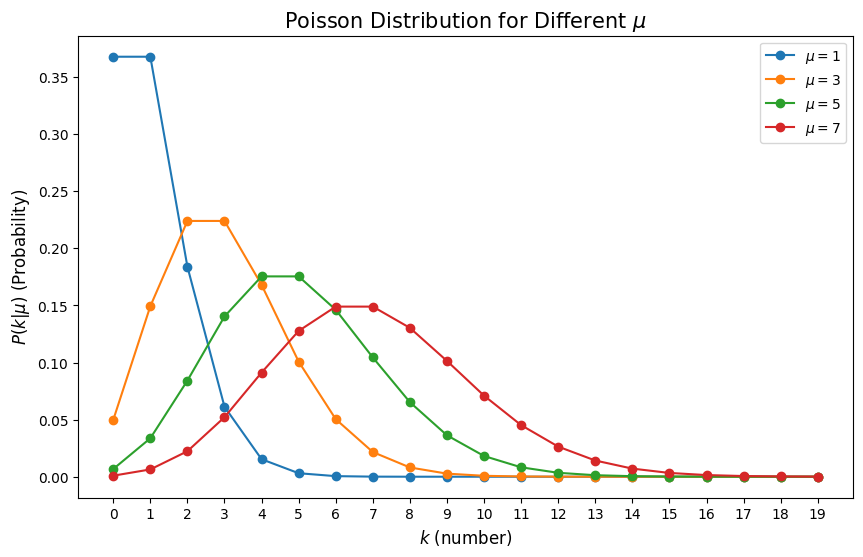

In [28]:
# Define a range of k values and mu values
k_values = np.arange(0, 20)
mu_values = [1, 3, 5, 7]

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Poisson distribution for each mu
for mu in mu_values:
    probabilities = stats.poisson.pmf(k_values, mu)
    ax.plot(k_values, probabilities, marker='o', linestyle='-', label=r'$\mu={:d}$'.format(mu))

# Set the labels and title
ax.set_xlabel(r'$k$ (number)', fontsize=12)
ax.set_ylabel(r'$P(k|\mu)$ (Probability)', fontsize=12)
ax.set_title(r'Poisson Distribution for Different $\mu$', fontsize=15)

# Add a legend
ax.legend()

# Set xticks to match k_values
ax.set_xticks(k_values)

plt.show()

In the limit where $\mu$ is large the Poisson distribution approaches a Gaussian distribution with the same mean and variance, i.e.
$$
P(k|\mu) \approx \mathcal{N}(k|\mu, \sqrt{\mu}), \quad \text{for} \quad \mu \gg 1.
$$


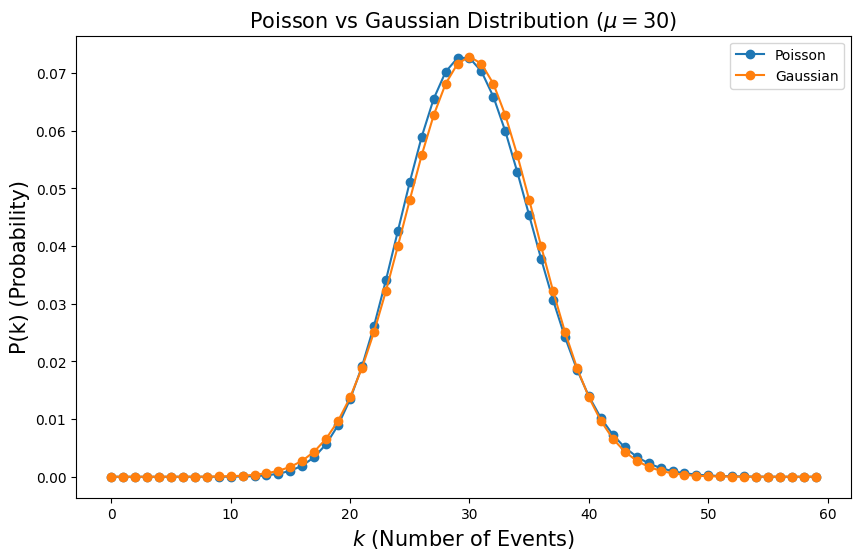

In [29]:

mu = 30  # mean rate
sigma = np.sqrt(mu)  # standard deviation for Gaussian

# Define a range of k values
k_values = np.arange(0,60)

# Calculate the Poisson probabilities
poisson_probabilities = stats.poisson.pmf(k_values, mu)

# Calculate the Gaussian probabilities
gaussian_probabilities = stats.norm.pdf(k_values, mu, sigma)

# Create a figure and an axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Poisson distribution
ax.plot(k_values, poisson_probabilities, marker='o', linestyle='-', label='Poisson')

# Plot the Gaussian distribution
ax.plot(k_values, gaussian_probabilities, marker='o', linestyle='-', label='Gaussian')

# Set the labels and title
ax.set_xlabel('$k$ (Number of Events)', fontsize=15)
ax.set_ylabel('P(k) (Probability)', fontsize=15)
ax.set_title(r'Poisson vs Gaussian Distribution ($\mu = 30$)', fontsize=15)

# Add a legend
ax.legend()



plt.show()

##### Example: Counting Photons in Astronomy

In astronomy we use telescopes with large apertures (the area of the lens or mirror) to collect photons (light) from astronomical sources. The arrival of these
photons obeys Poisson statistics. Let $N$ be the mean number of photons detected in some time interval, which you can identify with the exposure time, $t$,  of the digital 
camera on the instrument attached to our telescope. The Poisson distribution for the number of photons detected in this time interval is then
$$
P(k| N) = \frac{N^k}{k!}\exp(-N), 
$$
where $k$ is the number of photons actually detected in the interval. From above, we know that 
$$
\sigma_k = \sqrt{N},
$$
which is the well-known $\sqrt{N}$ rule for the standard deviation of photon-counting statistics. 

We often speak of the signal-to-noise ratio
$$
{\left(\rm \frac{S}{N}\right)} \equiv  {\rm \frac{Signal}{Noise}} = \frac{N}{\sqrt{N}} = \sqrt{N}. 
$$

Most astronomical sources do not vary in brightness on the short timescales of our digital camera exposures, such that it is a very good approximation to assume that the average rate
at which photons are being emitted, $R$ (units: photons/second), is equal to a constant over the time interval $t$, hence
$$
N = R t,
$$
so we can finally write
$$
{\left(\rm \frac{S}{N}\right)} = \sqrt{R t} \propto \sqrt{t}.
$$
We have just derived that the signal-to-noise ratio of an astronomical obesrvation improves only as the square root of the exposure time in the limit where photon counting from the object is the dominant source of noise. 